In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr
from math import sqrt


In [ ]:
era5_climate = pd.read_csv(r"era5_wefesiteanalyst_finca_turrialba.csv")
date_range = pd.date_range(start='2022-04-30 18:00:00', freq='H', periods=len(era5_climate))

era5_climate.set_index(date_range, inplace=True)
#era5_climate.drop(columns[0], axis=1, inplace=True)

# Set the date range as the index of the DataFrame
# era5_climate.set_index(era5_climate['datetime'], inplace=True)

era5_climate.head()

In [ ]:
# load local weather data file
local_weather = pd.read_csv(r"local.csv")
local_weather.head()


# Create a date range with the desired starting date and frequency
date_range = pd.date_range(start='2022-05-29 15:30:00', freq='30min', periods=len(local_weather))

# Set the date range as the index of the DataFrame
local_weather.set_index(date_range, inplace=True)
 
    
# create new dataframe only consisting out of data for required parameters


columns = ['t_air_is', 'windspeed_is', 'tp_is','ghi_is', 'e_is']
# check whether local measurement was ETO, from era5 we have retrieved evapo total, eto is also available though
values = local_weather[columns].values
sp = pd.DataFrame(values, columns=columns, index = local_weather.index)

sp.head()
print(sp.dtypes)

# convert the datatype of a column to numeric
sp = sp.apply(pd.to_numeric, errors = 'coerce')

# check the datatypes again
print(sp.dtypes)

# Group by hour
# grouped = selected_parameters.groupby(pd.Grouper(freq='H'))

# Calculate mean of each group
# local_weather_H = grouped.mean()

# Resample the 30-minute timeseries data to hourly data
local_weather_H = sp.resample('H').mean(numeric_only=True)
# convert rain  unit (sum value (required after calculating mean) and convert inch to mm)
local_weather_H['tp_is'] *= 2*25.4
# convert ET unit (sum value and convert inch to mm)
local_weather_H['e_is'] *= 2*25.4
# convert wind speed unit (mph to m/s)
local_weather_H['windspeed_is']*=0.44704 
# convert temperature unit (Fahrenheit to Celsius)
local_weather_H['t_air_is']=(local_weather_H['t_air_is']-32)/1.8
local_weather_H.head()


In [ ]:
# cutting remote and local data set according comparison period (2022-06-01 - 2022-11-30)
# does not work, creating overall dataframe is done with a step in excel
start_date = '2022-06-01 00:00:00'
end_date = '2022-12-01 00:00:00'

#era5_climate = era5_climate.loc[start_date:end_date]
local_weather_H = local_weather_H.loc[start_date:end_date]

print(era5_climate)
print(local_weather_H)
print(era5_climate.dtypes)
print(local_weather_H.dtypes)

# results = pd.concat(['era5_climate'], ['local_weather_H']) -> does not work we connect the dataframes via excel..

era5_climate.to_csv('era5_climate.csv')
local_weather_H.to_csv('local_weather_H.csv')

In [9]:
results = pd.read_csv('results.csv')
date_range = pd.date_range(start='2022-06-01 00:00:00', freq='H', periods=len(results))

results.set_index(date_range, inplace=True)
results.head()

,t_air_is,windspeed_is,tp_is,ghi_is,e_is,ghi_r,t_air_r,e_r,tp_r,windspeed_r
2022-06-01 00:00:00,19.166667,1.34112,0.0,0.0,0.0,0.0,17.237000,-0.004736,0.003877,1.035243
2022-06-01 01:00:00,19.722222,0.44704,0.0,0.0,0.0,0.0,16.918060,-0.004725,0.149729,1.176585
2022-06-01 02:00:00,19.444444,0.67056,0.0,0.0,0.0,0.0,16.775116,-0.006014,0.047648,0.709445
2022-06-01 03:00:00,19.444444,0.22352,0.0,0.0,0.0,0.0,17.042572,-0.004135,0.015183,0.603492
2022-06-01 04:00:00,18.888889,0.44704,0.0,0.0,0.0,0.0,16.425750,-0.003974,0.008561,0.400549


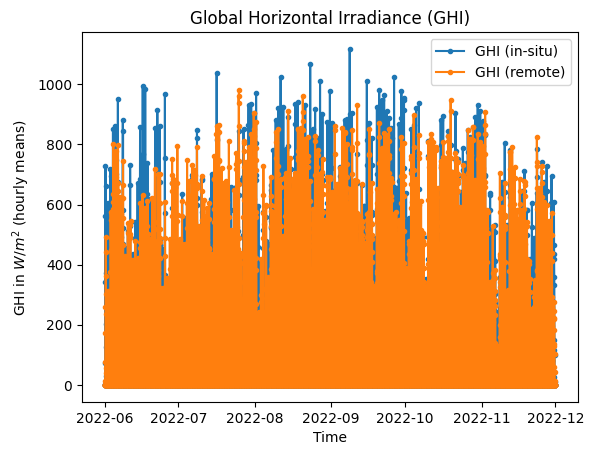

Pearson's Correlation Coefficient: 0.8296141339110075
Global Horizortal Irradiation (in-situ): 640.734 kWh/m²
Global Horizortal Irradiation (remote): 770.353965552974 kWh/m²


In [32]:
# Global Horizontal Irradiance
# Calculate the Pearson's Correlation Coefficient
correlation, p_value = pearsonr(results['ghi_is'], results['ghi_r'])

# calculate the total global horizontal solar radiation over the timespan
sum_ghi_is = (results['ghi_is'].sum())/1000
sum_ghi_r = (results['ghi_r'].sum())/1000

# plot global horizontal irradiance

plt.plot(results['ghi_is'], label='GHI (in-situ)', marker='.')
plt.plot(results['ghi_r'], label='GHI (remote)', marker='.')
plt.xlabel('Time')
plt.ylabel('GHI in $W/m^2$ (hourly means)')
plt.title("Global Horizontal Irradiance (GHI)")
# Add text to the lower center of the plot
#plt.text(0.5, 0.2, "Pearson's Correlation Coefficient:"+ str(correlation)+"\n+" in $kWh/m²$ \nnGlobal Horizortal Irradiation (remote): "+str(sum_ghi_r)+" in $kWh/m²$",
#         fontsize=9,
#         ha='center',
#     transform=plt.gcf().transFigure)
plt.legend()
plt.show()

# Print
print("Pearson's Correlation Coefficient:", correlation)
print("Global Horizortal Irradiation (in-situ): "+str(sum_ghi_is)+" kWh/m²")
print("Global Horizortal Irradiation (remote): "+str(sum_ghi_r)+" kWh/m²")


Pearson's Correlation Coefficient: 0.8358747012063921


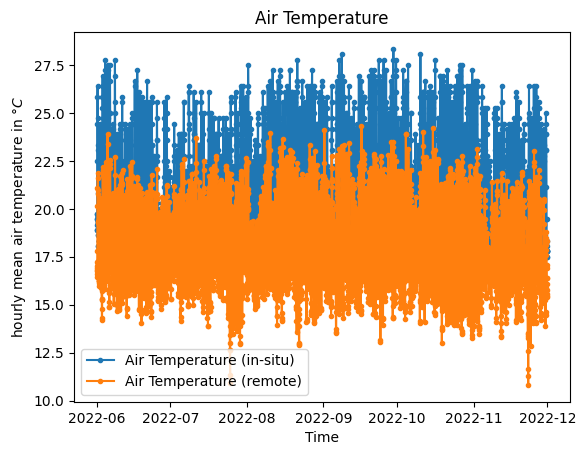

Pearson's Correlation Coefficient: 0.8358747012063921
Mean Air Temperature (in-situ): 20.493841211953107 °C
Mean Air Temperature (remote): 17.76481268370134 °C


In [34]:
# Temperature
# Calculate the Pearson's Correlation Coefficient
correlation, p_value = pearsonr(results['t_air_is'], results['t_air_r'])


# calculate the mean of column 'B'
mean_t_air_is = results['t_air_is'].mean()
mean_t_air_r = results['t_air_r'].mean()

# The correlation value indicates the strength and direction of the relationship between the two columns
print("Pearson's Correlation Coefficient:", correlation)

# plot global horizontal irradiance

plt.plot(results['t_air_is'], label='Air Temperature (in-situ)', marker='.')
plt.plot(results['t_air_r'], label='Air Temperature (remote)', marker='.')
plt.xlabel('Time')
plt.ylabel('hourly mean air temperature in $°C$')
plt.title("Air Temperature")
plt.legend()
plt.show()

# Print
print("Pearson's Correlation Coefficient:", correlation)
print("Mean Air Temperature (in-situ): "+str(mean_t_air_is)+" °C")
print("Mean Air Temperature (remote): "+str(mean_t_air_r)+" °C")

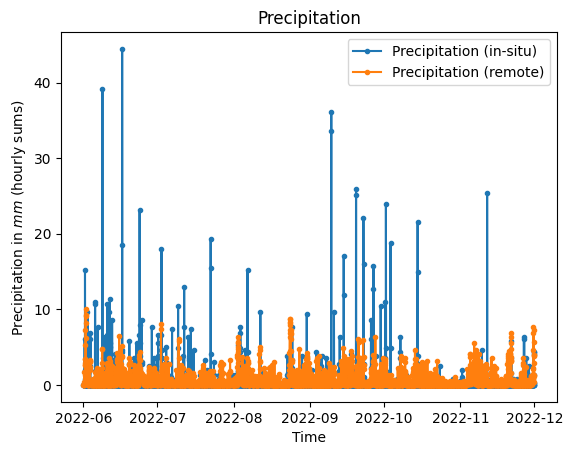

Pearson's Correlation Coefficient: 0.8296141339110075
Precipitation (in-situ): 1518.92 mm
Precipitation (remote): 2369.151362056 mm


In [31]:
# Precipitation
# Calculate the Pearson's Correlation Coefficient
correlation, p_value = pearsonr(results['ghi_is'], results['ghi_r'])

# calculate the total global horizontal solar radiation over the timespan
sum_tp_is = results['tp_is'].sum()
sum_tp_r = results['tp_r'].sum()

# plot global horizontal irradiance

plt.plot(results['tp_is'], label='Precipitation (in-situ)', marker='.')
plt.plot(results['tp_r'], label='Precipitation (remote)', marker='.')
plt.xlabel('Time')
plt.ylabel('Precipitation in $mm$ (hourly sums)')
plt.title("Precipitation")
# Add text to the lower center of the plot
#plt.text(0.5, 0.2, "Pearson's Correlation Coefficient:"+ str(correlation)+"\n+" in $kWh/m²$ \nnGlobal Horizortal Irradiation (remote): "+str(sum_ghi_r)+" in $kWh/m²$",
#         fontsize=9,
#         ha='center',
#     transform=plt.gcf().transFigure)
plt.legend()
plt.show()

# Print
print("Pearson's Correlation Coefficient:", correlation)
print("Precipitation (in-situ): "+str(sum_tp_is)+" mm")
print("Precipitation (remote): "+str(sum_tp_r)+" mm")
